# Tugas - KNN_PCA pada data iris

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/ZuhriaMaulidaSalsa/Pendata/main/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [47]:
df.shape

(205, 2)

In [4]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
X=df.iloc[:,0:2].values
y=df.iloc[:,2].values

<ipython-input-14-f4eae8769c11>:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  plt.hist(X[y==lab, i],


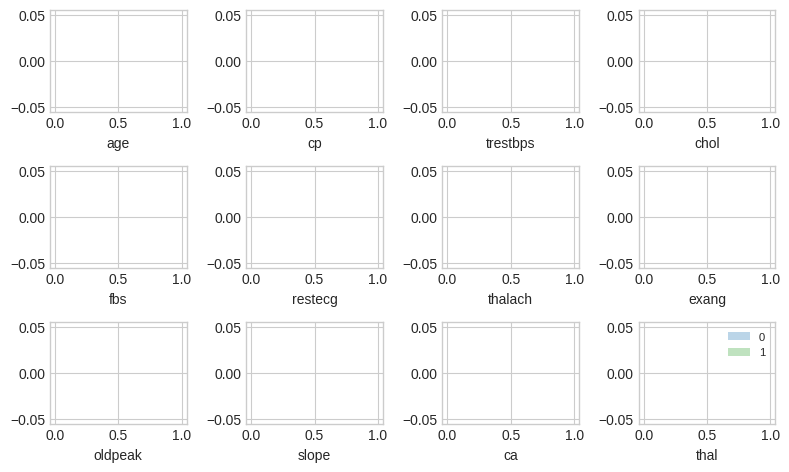

In [14]:
label_dict={1: '1',
           2: '0'}
feature_dict={0: 'age',1: 'cp',2: 'trestbps',3: 'chol', 4: 'fbs',5: 'restecg',6: 'thalach',7:'exang',8: 'oldpeak',9: 'slope',10: 'ca',11: 'thal'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8,6))
    for i in range(12):
        plt.subplot(4,4,i+1)
        for lab in ('0','1'):
            plt.hist(X[y==lab, i],
                    label=lab,
                    bins=10,
                    alpha=0.3)
        plt.xlabel(feature_dict[i])
    plt.legend(loc='upper right', fancybox=True,fontsize=8)
    
    plt.tight_layout()
    plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler
X_std=StandardScaler().fit_transform(X)

In [16]:
mean_vec=np.mean(X_std,axis=0)
cov_mat=(X_std-mean_vec).T.dot((X_std-mean_vec))/(X_std.shape[0]-1)
print("Covariance Matrix \n%s" %cov_mat)

Covariance Matrix 
[[ 1.00097656 -0.10334112]
 [-0.10334112  1.00097656]]


In [17]:
print("Numpy Covariance matrix \n%s" %np.cov(X_std.T))

Numpy Covariance matrix 
[[ 1.00097656 -0.10334112]
 [-0.10334112  1.00097656]]


In [18]:
cov_mat=np.cov(X_std.T)

eig_vals, eig_vecs=np.linalg.eig(cov_mat)

print("Eigenvectors \n%s" %eig_vecs)
print("Eigenvelues \n%s" %eig_vals)

Eigenvectors 
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
Eigenvelues 
[1.10431768 0.89763544]


In [19]:
corr_mat1=np.corrcoef(X_std.T)

eig_vals, eig_vecs=np.linalg.eig(corr_mat1)

print("Eigenvectors \n%s" %eig_vecs)
print("Eigenvelues \n%s" %eig_vals)

Eigenvectors 
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
Eigenvelues 
[1.1032403 0.8967597]


In [20]:
cor_mat2=np.corrcoef(X.T)
eig_vals, eig_vecs=np.linalg.eig(cor_mat2)

print("Eigenvectors \n%s" %eig_vecs)
print("Eigenvelues \n%s" %eig_vals)

Eigenvectors 
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
Eigenvelues 
[1.1032403 0.8967597]


In [21]:
u, s, v=np.linalg.svd(X_std.T)
u

array([[-0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]])

In [22]:
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print("Everithing is ok")

Everithing is ok


In [23]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.1032402975943558
0.8967597024056443


In [24]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

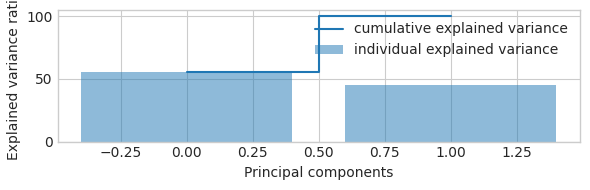

In [31]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 2))

    plt.bar(range(2), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(2), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [32]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(2,1),
                      eig_pairs[1][1].reshape(2,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


In [33]:
Y = X_std.dot(matrix_w)

<ipython-input-34-dcb7c18bb357>:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  plt.scatter(Y[y==lab, 0],
<ipython-input-34-dcb7c18bb357>:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  Y[y==lab, 1],


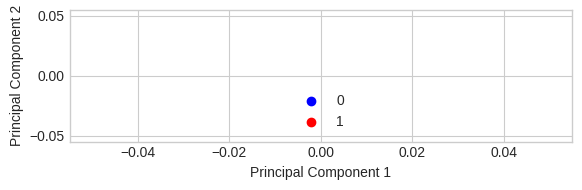

In [34]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 2))
    for lab, col in zip(('0', '1'),
                        ('blue', 'red')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [35]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

<ipython-input-37-dd4026bae1b8>:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  plt.scatter(Y_sklearn[y==lab, 0],
<ipython-input-37-dd4026bae1b8>:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  Y_sklearn[y==lab, 1],


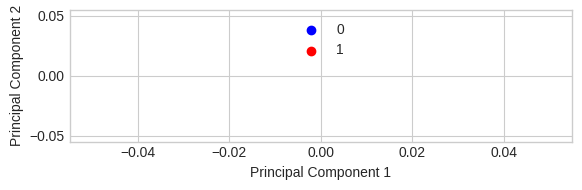

In [37]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 2))
    for lab, col in zip(('0', '1'),
                        ('blue', 'red')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='upper center')
    plt.tight_layout()
    plt.show()

In [38]:
data=pd.DataFrame(Y_sklearn)
data.columns=['PC1','PC2']
data

,PC1,PC2
0,-0.657567,-0.277941
1,-0.579588,-0.355920
2,0.746062,-1.681570
3,0.044247,-0.979756
4,1.658919,0.478957
...,...,...
1020,-0.111711,-0.823797
1021,-0.033732,-0.901776
1022,-1.047464,0.111956
1023,0.723166,1.414710


In [39]:
data['target']=df['target']
data

,PC1,PC2,target
0,-0.657567,-0.277941,0
1,-0.579588,-0.355920,0
2,0.746062,-1.681570,0
3,0.044247,-0.979756,0
4,1.658919,0.478957,0
...,...,...,...
1020,-0.111711,-0.823797,1
1021,-0.033732,-0.901776,0
1022,-1.047464,0.111956,0
1023,0.723166,1.414710,1


In [40]:
dataset = data
X = dataset.iloc[:,:2].values
y = dataset['target'].values
dataset.head(5)

,PC1,PC2,target
0,-0.657567,-0.277941,0
1,-0.579588,-0.355920,0
2,0.746062,-1.681570,0
3,0.044247,-0.979756,0
4,1.658919,0.478957,0


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [44]:
y_pred = classifier.predict(X_test) 
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0])

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))
cm

Accuracy :  0.6487804878048781


array([[59, 43],
       [29, 74]])

In [46]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,1,0
1,1,1
2,0,0
3,1,1
4,0,1
...,...,...
200,1,0
201,1,1
202,1,1
203,0,0
